<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/20_Basketball_Sports_Analytics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

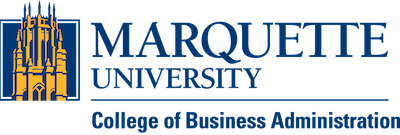



#BUAN4060: Unstructured Data Analytics

##20 Sports Analytics 3: Basketball Analysis

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Introduction to Sports Analytics using R by Ryan Elmore | Andrew Urbaczewski`[GitHub Page](https://github.com/rtelmore)

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb

## 1. R Packages needed for Basketball Analysis

In [3]:
system("sudo apt-get update")
system("sudo apt-get install -y libpng-dev libjpeg-dev")

In [6]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("ISAR") # Introduction to Sports Analytics using R
install.packages("lubridate") # Make Dealing with Dates a Little Easier
install.packages("mgcv") # Mixed GAM Computation Vehicle with Automatic Smoothness Estimation
install.packages("gganimate") # works with ggplot2 to create animations
# install.packages("nbastatR") # access NBA data through the league's official API
install.packages("sportyR") # ggplot-scaled representations of sports fields/courts
# install.packages("gifski") # converts images to GIF animations
install.packages("wehoop") # access women's basketball play-by-play data
install.packages("tidyr") # pivots and nests data
install.packages("teamcolors") # the color palettes for pro sports teams
install.packages("devtools")
devtools::install_github("abresler/nbastatR")

library(ggplot2)
library(dplyr)
library(ISAR) # Introduction to Sports Analytics using R
library(lubridate) # Make Dealing with Dates a Little Easier
library(mgcv) # Mixed GAM Computation Vehicle with Automatic Smoothness Estimation
library(gganimate) # works with ggplot2 to create animations
library(nbastatR) # access NBA data through the league's official API
library(sportyR) # ggplot-scaled representations of sports fields/courts
# library(gifski) # converts images to GIF animations
library(wehoop) # access women's basketball play-by-play data
library(tidyr) # pivots and nests data
library(teamcolors) # the color palettes for pro sports teams

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'nbastatR' from a github remote, the SHA1 (72670a68) has not change

##2. If You Don't Know Anything about Basketball

Basketball is a simple enough game that older adults and young children can play it using exactly the same parameters as those who play it at the highest levels

The court is still 94 feet long, the basket is still 10 feet in the air, and the ball is the same size, albeit women’s competitions use a 28.5-inch ball instead of the 29.5-inch ball that the men use

The real difference, of course, is in the skill of the players.

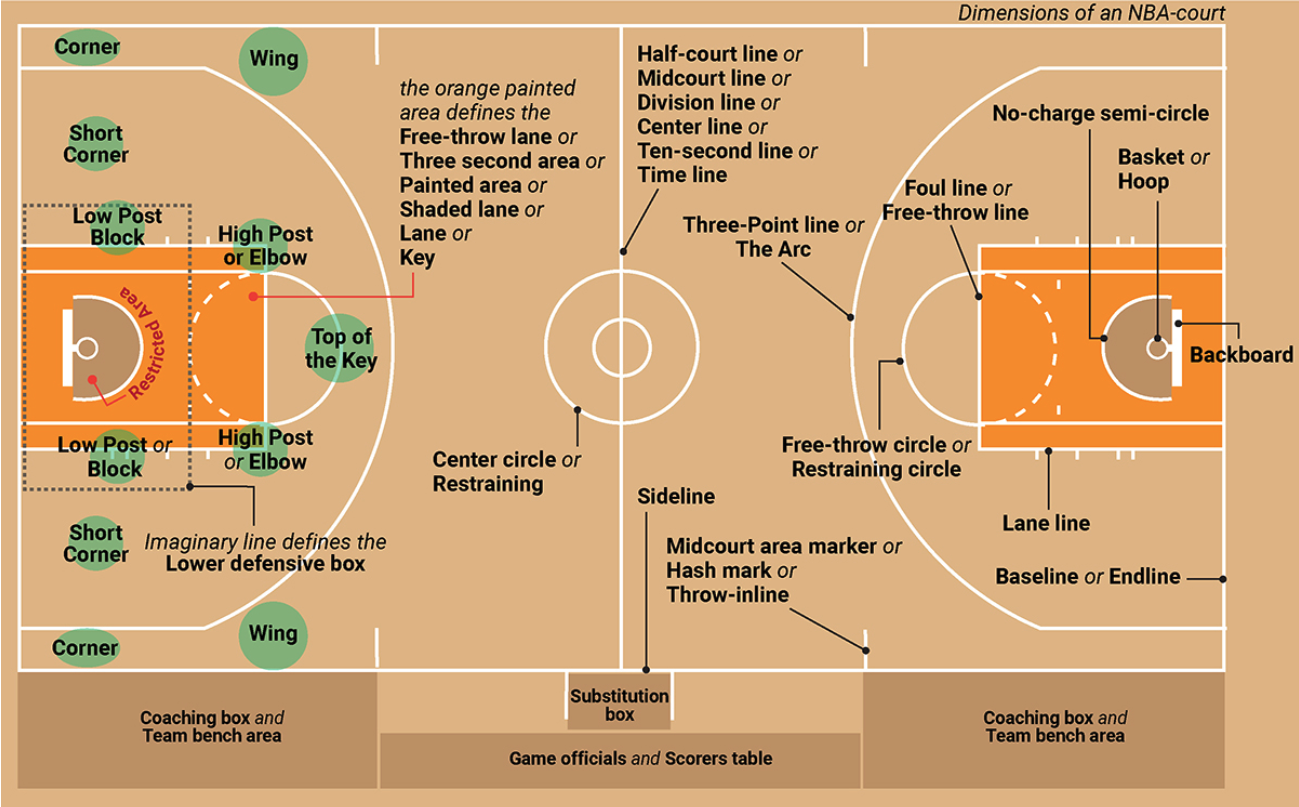

In its simplest form, two teams of five players each try to score more points than the other team over either two halves or four quarters

In the NBA, the
game is played through four 12-minute quarters. Points are scored by throwing the ball (shooting) into the basket, which is perched generally 10 feet (3.05
meters) over the floor, one at each end of the court representing the goal for each team

Two points are awarded for a made basket, and if the shot was
taken from a long way away, behind an arc approximately 23 feet (7 meters) from the basket, three points are awarded. The defense tries to disrupt the
players from making the baskets by standing close to them and trying to take the ball away (steal) from them or knock the ball away as it leaves the
shooter’s hands (block)

If the defense were to knock the player's arms or legs or push them while they are shooting, a foul is called on the defender, and
the shooter will get two attempts to make an unimpeded shot (free throws) from a line 15 feet (4.57 meters) directly in front of the basket. Each free throw
is worth one point

If a player commits five or six fouls (depending on the league) during the course of a game, that player is disqualified for the rest of the
game. When the game is played on the playground, it is often played as the first team to reach a certain number of baskets (usually 15) with shots behind
the three-point line counting double

Basketball has grown to perhaps the second most popular sport globally, behind only soccer. While it is the one major team sport played in America that
is likely uniquely and authentically American, there have been many efforts to grow the game around the world

The USA still dominates the men's Olympic basketball tournament, having won the gold medal in 16 of the 19 Olympics in which it has participated, but hotbeds of basketball are developing around the world

China, Western Europe, Australia, the Baltic Republics, and the Adriatic countries are large markets for basketball and send many players
to play in professional and amateur leagues in the United States

For the purposes of this book, we will be using the dimensions of an NBA court and games played under NBA rules. The international court is slightly
smaller, and the three-point line is also slightly closer under international rules, and there are other more subtle differences, but NBA players usually have
no trouble adjusting when going back and forth between NBA games and international competitions such as the Olympic Games

FIBA, the governing body for basketball globally, has continually made the court and the rules more similar to NBA rules over the years

##3. Basic Basketball Metrics

Unlike baseball, basketball is free-flowing and is not a collection of discrete events that can be studied individually or on the whole

That is, there are not defined breaks between pitches or balls in play in basketball. It can be divided somewhat accurately into possessions,
and certainly, we can track things like shots and rebounds (though both of those with a bit of a margin for error when balls are being tipped around), fouls, time played by each player, and the like

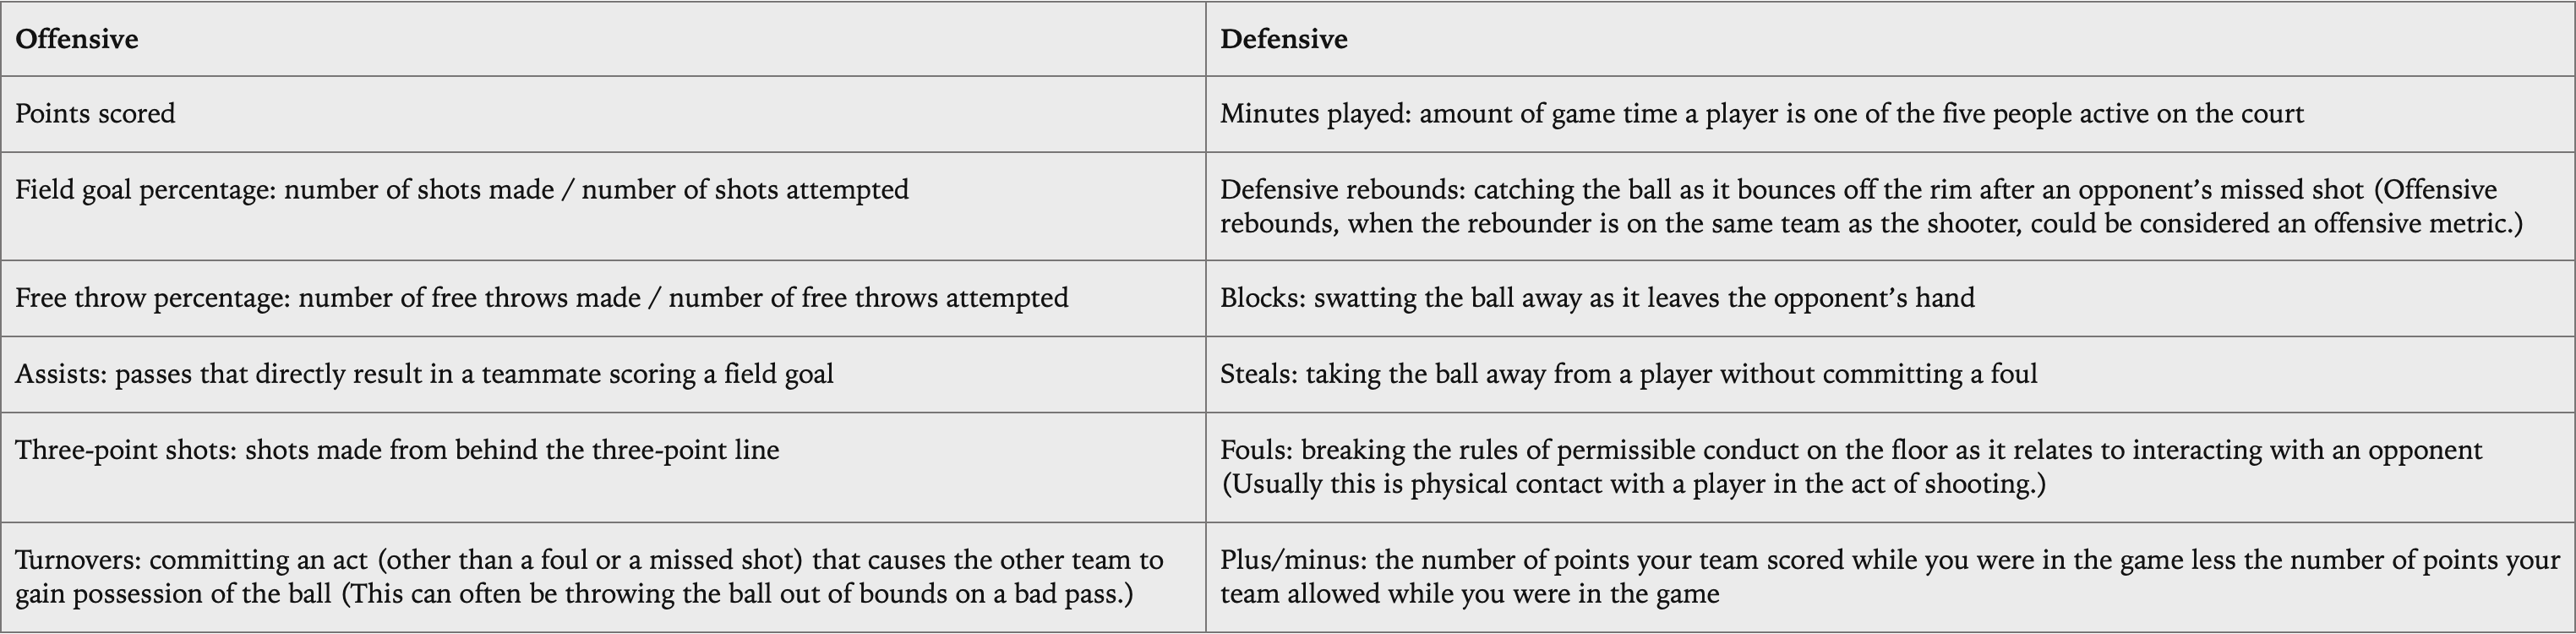

##4. Four Factors

The notion of the “four factors” was developed by Dean Oliver and is explained in his book Basketball on Paper, available at http://basketballonpaper.com.
His original formulation assigned the following weight to wins: shooting (40%), turnovers (25%), rebounding (20%), and free throws (15%)

There has
been a lot of debate about the appropriateness of the weighting of these factors, and we will look at some aspects of weighting in this chapter. Most people still agree, however, that the four factors are extremely important to a team's success. Note, too, that while these four factors describe a team's offensive efficiency, they can also be used to describe the efficiency of a team’s defense (i.e., What is our opponent's effective field goal percentage?)

The factors are as follows:
1. Effective field goal percentage
2. Turnovers committed per possession
3. Offensive rebounding percentage
4. Free throw rate

##4.1 Effective Field Goal Percentage (EFG)

Effective field goal (EFG) percentage is a means of resolving the difference between two-point and three-point field goals

It gives more weight to threepointers relative to two-pointers. How much more weight? It adds 50% more to a three-pointer because they are worth 50% more points

Upon examining the nba_games_2023 data frame (which you will find in the ISAR package), we note that we can mutate this data frame to calculate EFG,
or we could also just look at the advanced box score for each game

Let's examine these and compare the figures from both tables

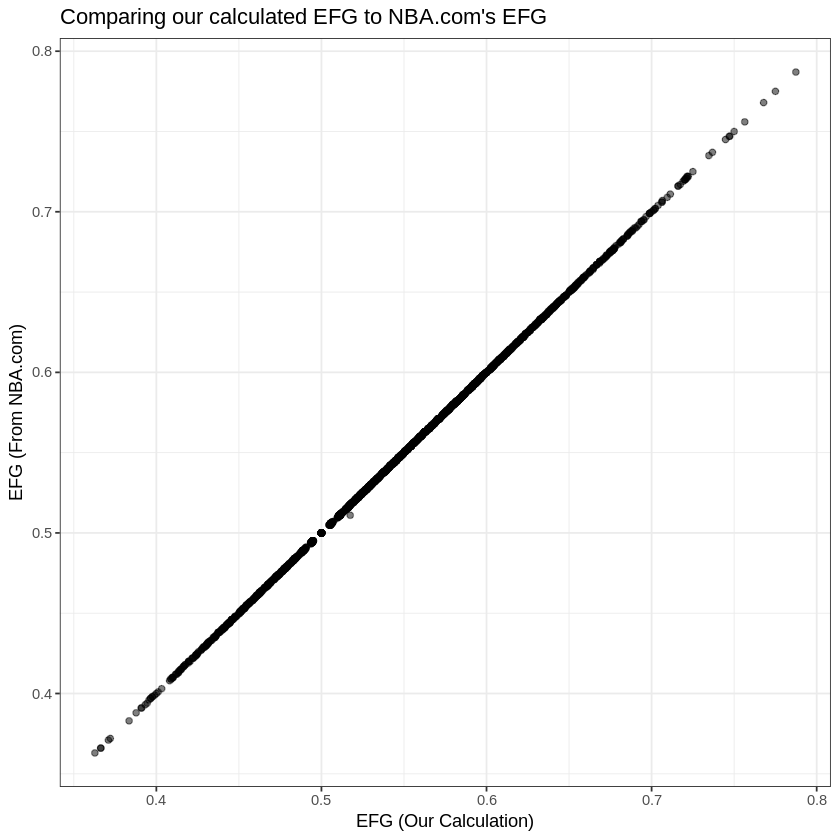

In [7]:
games <- nba_games_2023 |>
  mutate(fg2m = fgm - fg3m, #explicitly separate 2 and 3 point baskets
    efg = (fg2m + 1.5*fg3m)/(fga))
df_merge <- dplyr::left_join(games, nba_adv_team_2023,
    by = c("team_id", "team_abbreviation", "game_id", "min"))
p <- ggplot(data = df_merge,
    aes(x = efg, y = efg_pct))
p + geom_point(alpha = .5) +
  labs(title = "Comparing our calculated EFG to NBA.com's EFG",
    x = "EFG (Our Calculation)",
    y = "EFG (From NBA.com)") +
theme_bw()

##4.2 Turnovers Committed per Possession (TPP)

As the name suggests, turnovers committed per possession (TPP) is the number of turnovers committed relative to the number of possessions the team
had during the game

Turnovers (tov) and possessions (poss) are given in the nba_games_2023 and nba_adv_team_2023 tibbles, respectively:

In [8]:
df_merge <- df_merge |>
mutate(tpp = tov/poss)

##4.3 Offensive Rebounding Percentage

Roughly, offensive rebounding percentage (ORP) is the ratio of the total number of offensive rebounds to the number of offensive rebound possibilities.

Note that both offensive and defensive rebounds are given in the nba_games_2023 tibble, and the actual rates are given in the nba_ff_team_2023 and
nba_games_2023 tibbles. A team's ORP for a given game is simply

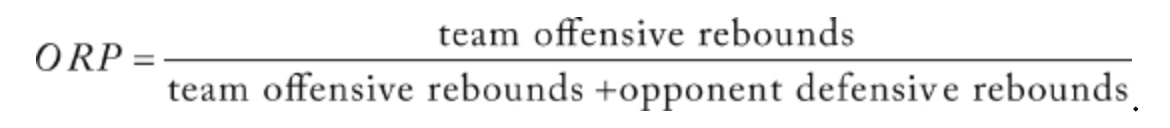

##4.4 Free Throw Rate

Free throw rate (FTR) is the ratio of free throw attempts (fta) to field goal attempts (fga). Both statistics are given in the nba_games_2023 tibble, and
FTR is given in nba_ff_team_2023

Let's look below at manually calculating the FTR in the nba_games_2023 tibble and compare it to what is reported in
the nba_ff_team_2023 table. We will print the first few rows to the console as a proof of concept:

In [9]:
left_join(nba_games_2023, nba_ff_team_2023,
by = c("team_id", "team_abbreviation", "game_id", "min")) |>
mutate(ftr = fta/fga) |>
select(fta_rate, ftr) |>
head()

fta_rate,ftr
<dbl>,<dbl>
0.350,0.3500000
0.341,0.3414634
0.232,0.2323232
0.266,0.2659574
0.221,0.2209302
0.261,0.2608696


These four factors are Oliver's representations of the areas where teams need to excel. Earlier, we showed how to obtain the data to calculate these metrics

We will continue to explore the four factors throughout the rest of the chapter

##5. Densities, Percentiles, and Z-Scores

Earlier we saw how to calculate and retrieve values for the four factors, but we did not discuss their usefulness. So how can we use the four
factors? We could examine the distribution of values for a single (or multiple) season(s)

Let's first look at these values for each team in the 2022-23 NBA
season. We will do this with a density plot (geom_density), which shows us the distribution of EFG across all teams in this season.

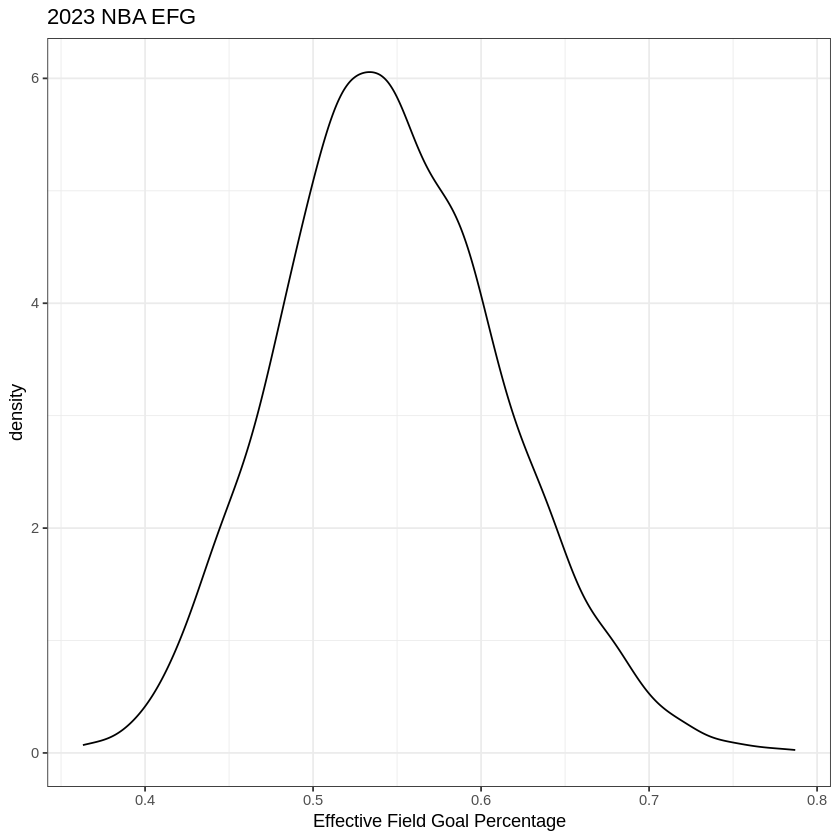

In [10]:
# Density
p <- ggplot(data = nba_adv_team_2023,
aes(x = efg_pct))
p + geom_density() +
labs(title = "2023 NBA EFG",
x = "Effective Field Goal Percentage") +
theme_bw()

# We can see that the highest density of team EFG is somewhere between 50% and 55%,
# but what is the average in this sample, and can we add a reference
# line to this plot to represent it? Certainly we can:

    • We will use mean() to calculate the mean.
    • We will use geom_vline() to add the vertical line.
    ◦ We will see the x-intercept of that line to the value of the mean.
    ◦ We will make the line dashed so that it stands out from the grid lines.

Note that we do not need to redefine the initial plot object, p, as we created it above

We are merely adding new layers to that plot object:

In [11]:
mean(nba_adv_team_2023$efg_pct, na.rm = T)

[1] 0.5468923

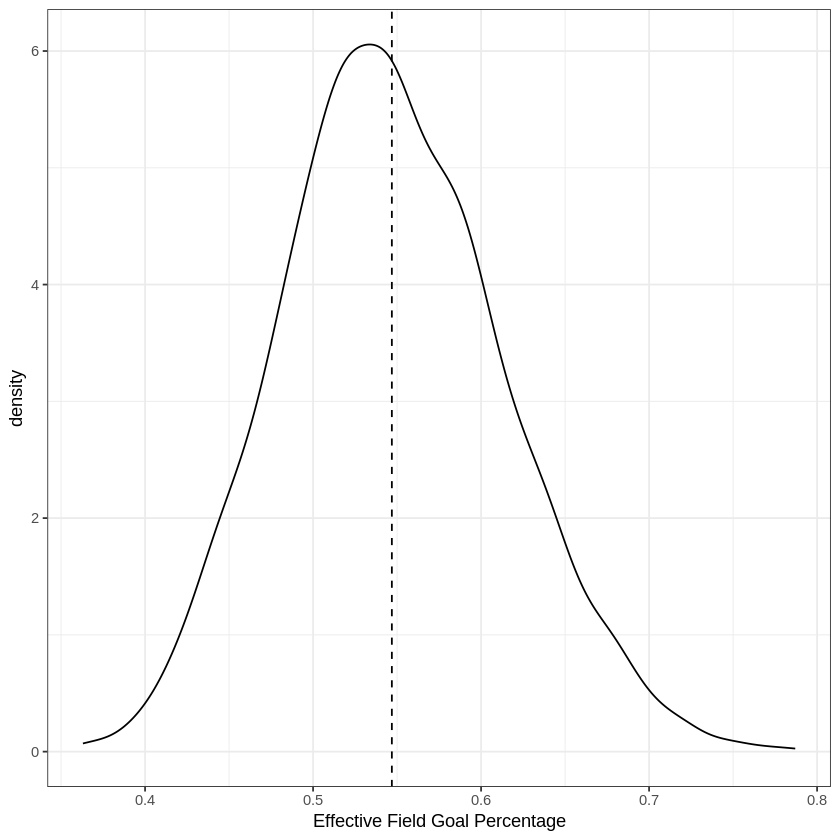

In [12]:
p + geom_density() +
geom_vline(xintercept = mean(nba_adv_team_2023$efg_pct, na.rm = T),
linetype = "dashed") +
labs(x = "Effective Field Goal Percentage") +
theme_bw()

One way to view the graphical results is to plot the four factors all at the same time. We can do this by creating a faceted plot

To do this, we have to
introduce a new function from the tidyr package, pivot_longer

First, we merge our previous dataset with the four factors data (nba_ff_team_2023)

Next, we define a win variable to TRUE if the game was a win, calculated by whether the variable plus_minus is greater than zero (meaning that the team
scored more points than they allowed), and otherwise set it to FALSE, meaning the game was a loss

Finally, we reformat the dataset to a long format from
the traditional wide format. The long format denormalizes the data so that we can print the plots as facets, as we can’t facet the data if a variable is split
across multiple columns

Let’s look at the entire dataset visually first before getting into wins and losses:

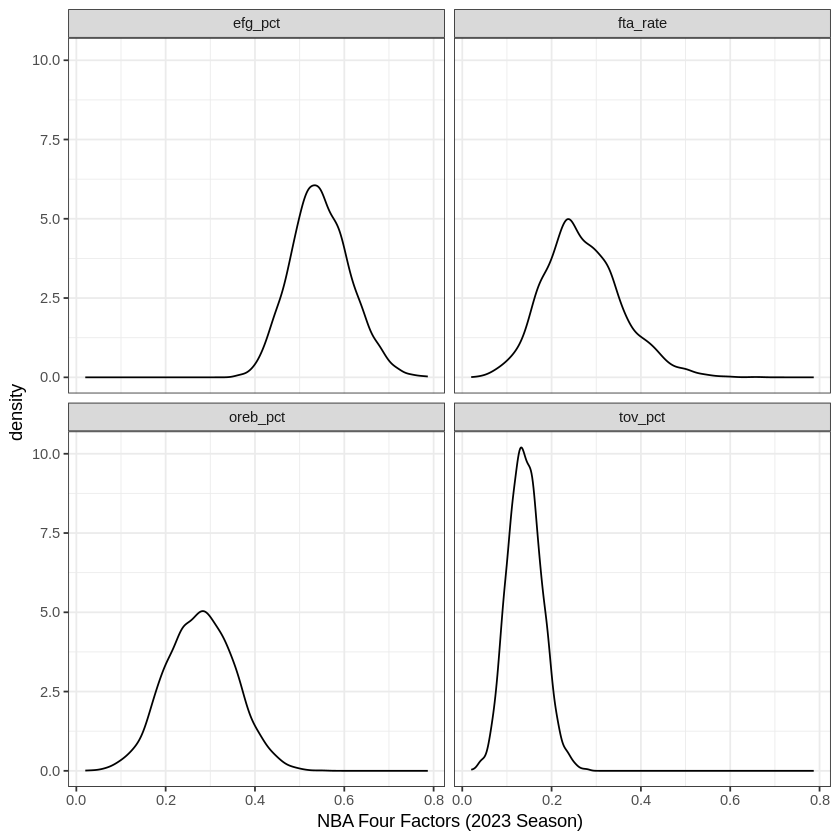

In [13]:
df_pivot <- df_merge |>
left_join(nba_ff_team_2023,
by = c("team_id", "team_abbreviation", "game_id", "min")) |>
mutate(win = ifelse(plus_minus > 0, TRUE, FALSE),
efg_pct = efg_pct.x,
tov_pct = tm_tov_pct.x/100,
oreb_pct = oreb_pct.x) |>
select(efg_pct, oreb_pct, tov_pct, fta_rate, win) |>
pivot_longer(cols = 1:4)
p <- ggplot(data = df_pivot,
aes(x = value))
p + geom_density() +
facet_wrap(~ name, ncol = 2) +
labs(x = "NBA Four Factors (2023 Season)") +
theme_bw()

Now let’s see how the results of the four factors compare in games that were wins and games that were losses

We can do this now by changing the
aesthetics (aes) to plot the values of each of the four factors on the x-axis (x = value) by each of the values for the win variable (TRUE and FALSE as we
calculated earlier)

Note that we use the scale_fill_brewer() to distinguish between the two cases, wins and losses:

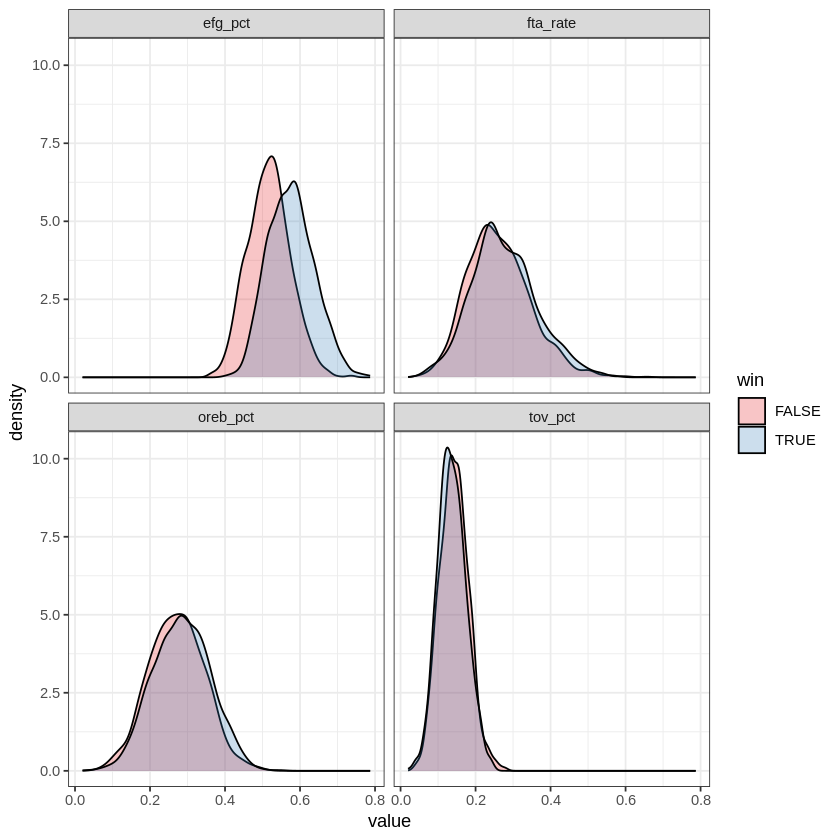

In [14]:
p <- ggplot(data = df_pivot,
aes(x = value, fill = win))
p + geom_density(alpha = .25) +
facet_wrap(~ name, ncol = 2) +
scale_fill_brewer(palette = "Set1") +
theme_bw()

Mostly, it seems that there is a lot of overlap, with the biggest difference being in EFG

EFG being different makes sense on its face, as games are graded
not on rebounds or turnovers but rather on points, and a higher EFG should yield higher points scored, which should create more wins

But why do you
think there is not a large difference in the other statistics?

##6. Specific Game Evaluation

In 2023, the Denver Nuggets defeated the Los Angeles Lakers for the NBA Western Conference Championship. But how did they play against each other in
the 2022–23 regular season?

We can turn our attention to the Denver Nuggets at Los Angeles Lakers game on December 6, 2022. The Lakers won this game 126 to 108, but the question remains: Did they play a good game?

Similarly, did the Nuggets necessarily play a bad game given that they lost? One could simply point to the scoreboard and say that this is all that is needed to evaluate the results; however, given that we are interested in sports analytics and seek to remove the anomalous results from our overall evaluation, we can do deeper dives into the data. To do this, we need to filter for the appropriate game in the nba_games_2023 table, get the game ID, and then use that to filter the nbagames_2023 table:

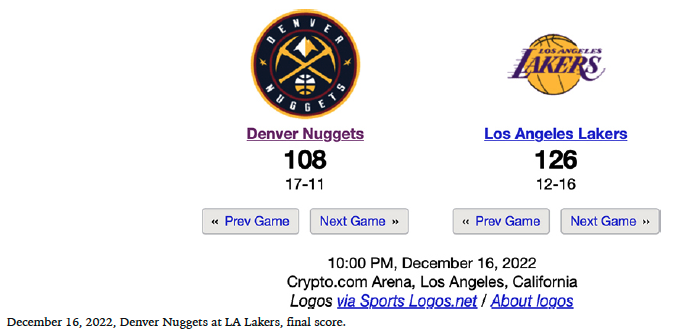

[Source](www.basketball-reference.com/boxscores/202212160LAL.html)

In [15]:
den_lal_id <- nba_games_2023 |>
dplyr::filter(game_date == ymd("2022-12-16"),
team_abbreviation %in% c("LAL", "DEN")) |>
dplyr::pull(game_id)
den_lal_adv <- nba_adv_team_2023 |>
dplyr::filter(game_id == den_lal_id[1])

# Now let’s create some lines to show how both the Nuggets and the Lakers performed on this night with respect to EFG
# This will show the performances for this one game as opposed to all the games from the 2023 season
# How would you interpret these results?

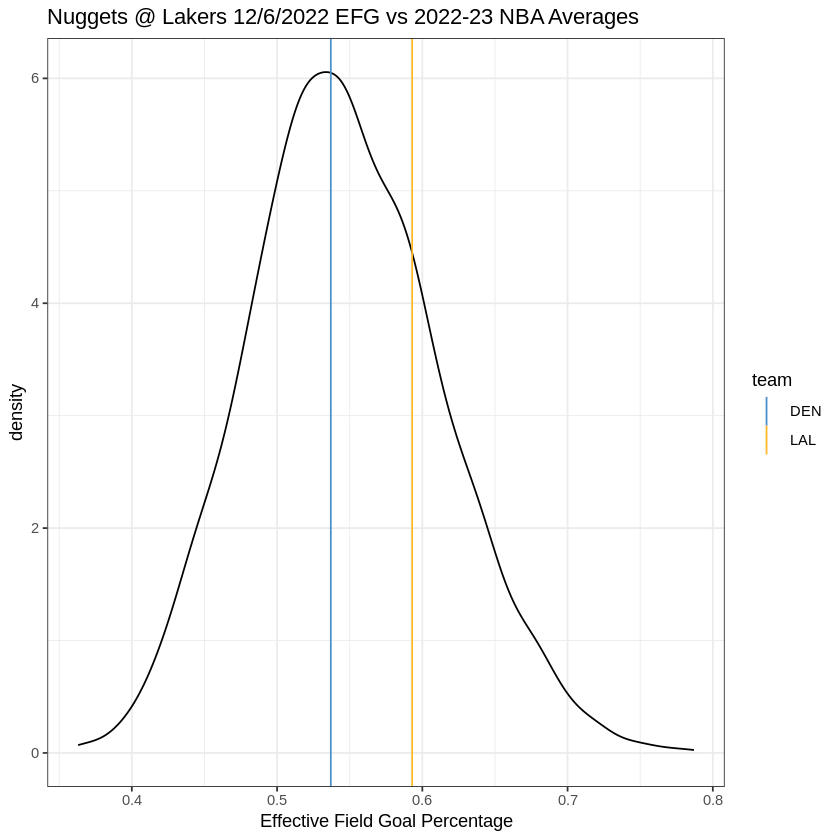

In [16]:
p <- ggplot(data = nba_adv_team_2023,
aes(x = efg_pct))
p + geom_density() +
geom_vline(data = den_lal_adv,
aes(xintercept = efg_pct, col = team_abbreviation)) +
guides(col = guide_legend("team")) +
scale_color_manual(values = c("#4D90CD", "#FDB927")) +
labs(title = "Nuggets @ Lakers 12/6/2022 EFG vs 2022-23 NBA Averages",
x = "Effective Field Goal Percentage") +
theme_bw()

It seems that the Nuggets had a fairly average night, and the Lakers were better than average relative to EFG

Let’s take the same logic and apply it to ORP. What is your interpretation of this plot?

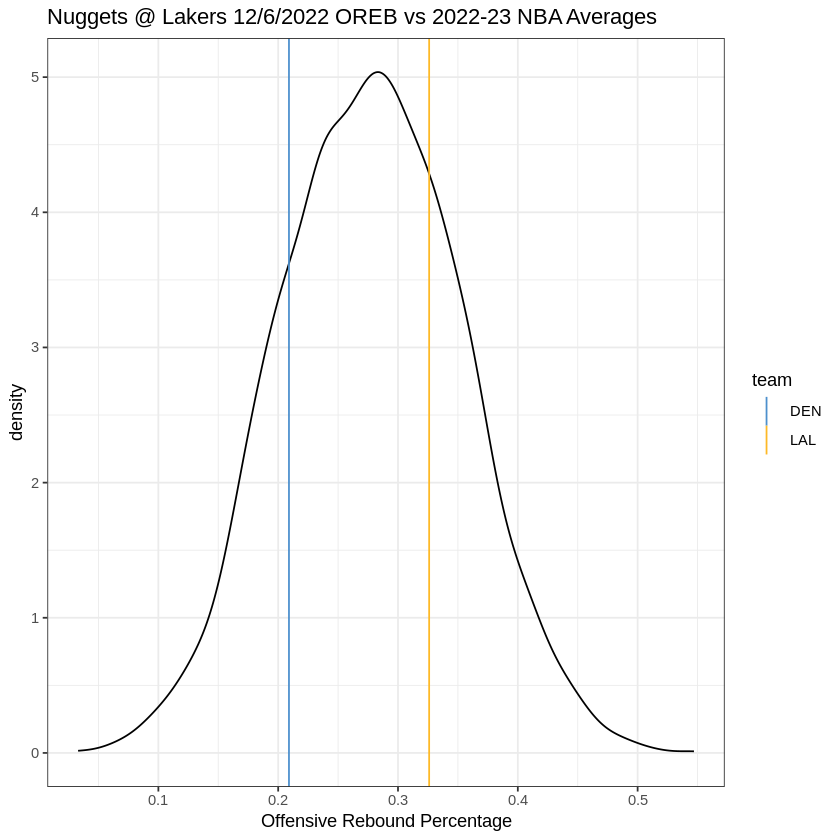

In [17]:
p <- ggplot(data = nba_adv_team_2023,
aes(x = oreb_pct))
p + geom_density() +
geom_vline(data = den_lal_adv,
aes(xintercept = oreb_pct, col = team_abbreviation)) +
guides(col = guide_legend("team")) +
scale_color_manual(values = c("#4D90CD", "#FDB927")) +
labs(title = "Nuggets @ Lakers 12/6/2022 OREB vs 2022-23 NBA Averages",
x = "Offensive Rebound Percentage") +
theme_bw()

The OREB shows that Denver performed less well than the overall season average (across all teams) and that Los Angeles performed quite well

This matches up with the EFG in the previous figure

So one argument could be that the Nuggets did not do the little things well—guarding Lakers players and following their shots to the rim to create putback opportunities in the cases of missed shots

##7. Computing Estimated Probabilities

We still need to answer the question of whether the teams played particularly well on this night

To do this, we can look at the EFG percentage that we
calculated earlier and compare it to the probability of the events happening

We will use the `ecdf()` function to find where in the cumulative distribution
the points for Denver’s and Los Angeles’s EFG appear given all the games in the 2022-23 season:

In [18]:
ecdf(nba_adv_team_2023$efg_pct)(den_lal_adv$efg_pct)
# This is saying that about 77% and 46% of the teams in this dataset (all 2023 games)
# had effective field goal percentages less than the Lakers and Nuggets, respectively, in this game

[1] 0.7674797 0.4585366

##8. Z-Scores

You may also remember z-scores from statistics as a calculation of the number of standard deviations that an observation is from the mean

We can calculate the z-score for the offensive rebounding percentages that we examined earlier in the chapter

Recall that the formula for a z-score is

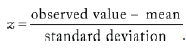

The code below shows the z-scores for Los Angeles and Denver in terms of offensive rebounding percentage

Note that Los Angeles had a little more than a
one-half standard deviation better than average night in offensive rebounding

On the other hand, Denver’s night was one to forget in that their offensive
rebounding percentage was approximately almost one standard deviation less than average:

In [19]:
(den_lal_adv$oreb_pct - mean(nba_adv_team_2023$oreb_pct)) /
sd(nba_adv_team_2023$oreb_pct)

[1]  0.6412986 -0.9171681

We can compute percentiles assuming a normal distribution by using the pnorm() formula. We use the z-scores computed above as the input into the
pnorm() function:

In [20]:
z_vals <- pnorm((den_lal_adv$oreb_pct -
mean(nba_adv_team_2023$oreb_pct)) /
sd(nba_adv_team_2023$oreb_pct))
names(z_vals) <- den_lal_adv$team_abbreviation
z_vals

LAL       DEN 
0.7393357 0.1795273

##9. Using the Four Factors to Predict Wins and Losses

Another way we could use the four factors is to predict their effects on whether a team wins a game. To do this, we will use logistic regression

In this case, we will use the generalized linear model `(glm)` function, with win as the dependent variable

We define a new data frame, df_reg, that we
essentially created earlier but did not store

Note that we must remove the variable plus_minus, because win is directly derived from plus_minus. To fit the
model, we write that the logit of win is a linear function of (~) by all the other variables in the data frame (.) except for the plus_minus variable (-
plus_minus)

We also tell `glm` that the dependent variable is binary (family = "binomial"), as it is either a win or a loss. We then print the output of the
glm function:

In [21]:
df_reg <- df_merge |>
dplyr::left_join(nba_ff_team_2023,
by = c("team_id", "team_abbreviation", "game_id", "min")) |>
dplyr::mutate(win = ifelse(plus_minus > 0, TRUE, FALSE),
efg_pct = efg_pct.x,
tov_pct = tm_tov_pct.x/100,
oreb_pct = oreb_pct.x) |>
dplyr::select(efg_pct, oreb_pct, tov_pct, fta_rate, win)
adv_glm <- glm(win ~ .,
data = df_reg,
family = "binomial")
summary(adv_glm)


Call:
glm(formula = win ~ ., family = "binomial", data = df_reg)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.1854     0.6120 -19.910  < 2e-16 ***
efg_pct      20.2032     0.9476  21.319  < 2e-16 ***
oreb_pct      7.0847     0.6837  10.362  < 2e-16 ***
tov_pct     -11.4324     1.3246  -8.631  < 2e-16 ***
fta_rate      2.8803     0.5604   5.139 2.75e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3410.3  on 2459  degrees of freedom
Residual deviance: 2680.2  on 2455  degrees of freedom
AIC: 2690.2

Number of Fisher Scoring iterations: 4


You may look at this output and not remember what all this means, or maybe chapter 4 was the first time you saw it. Or both. As we discussed there, the
important thing to note is the last column, more commonly known as a p-value. P-values are the probability that the component is contributing to the
model purely by chance and not because it has real predictive power

You will see that the probabilities associated with the coefficients, in order of
presentation, are 2e-16, 2e-16, 2e-16, and 2.75e-07. All of these values are extremely small numbers, which for our purposes are virtually 0

This means
that there is an approximately 0% chance that these variables do not contribute to the model’s prediction of the win variable. Generally speaking, whenever
the p-value is less than .05, we want to consider that variable as an important predictor in our model


Also important with the coefficients is their sign. EFG, ORP, and FTA all have positive signs, which means that as their value increases, the probability of
a win will also increase. Conversely, the sign of the TPP coefficient is negative, and hence, the probability of a win will decrease as TPP increases

This
should make sense, as we would expect high levels of EFG, ORP, and FTA to correlate with wins and high levels of TPP to correlate with losses.
An alternative formulation of the adv_glm object assignment is to explicitly write out the independent variables that are contained in the model

The
following code chunk shows the longhand version of the previous model specification:

In [22]:
adv_glm <- glm(win ~ efg_pct + oreb_pct + tov_pct + fta_rate,
data = df_reg,
family = "binomial")

##10. Shot Charts

While we have in the previous section examined the four factors and calculated their effectiveness in predicting wins and losses, one area we have left
unexplored is individual performance. EFG considers all two-point shots to be equivalent, no matter where on the court they happen between the threepoint
arc and the basket, and it also considers all three-point shots to be equivalent no matter where beyond the arc they occur

We can use additional
visualizations and analysis to create shot charts for players or teams to show greater detail on shot selection and success rates.
Coaches use shot charts to identify where players are shooting the ball and where they are making shots

Basketball analytics has changed much about
shot selection for players and teams. For example, a layup from 1 foot away from the basket counts for the same two points as a jump shot from 19 feet
away from the hoop, and the success rate on the layup is much greater than that of the midrange jumper

Moreover, the power of the three-point shot has
been noted as coaches look at points per possession and recognize that a 35% three-point success rate is better in points per possession (1.05) than a 50%
two-point shot success rate (1.00)

So if players are going to shoot the ball inside the three-point arc, they should probably work to get a shot from as close
to the basket as possible. Similarly, not all three-point shots are created equally, as the shot from 25 feet counts the same as one from 75 feet away. All-Star
players like Steph Curry and Damian Lillard are uncommonly accurate from 30 feet or more away from the basket, and neither are afraid to shoot from that
distance. Being accurate from a longer range forces opposing coaches to stretch out the defenses farther away from the basket, which creates more
opportunities for passing or dribbling all the way to the hoop unmolested for an easy layup attempt

In order to construct NBA shot charts, we first need to get data from the NBA Stats API using the nbastatR package employing the teams_shots()
function. The following code will download every shot by the Dallas Mavericks during the 2022–23 season. If you tried to execute it without increasing the
connection buffer, you would find it doesn’t work at all

So we need to include the Sys.setenv() function to enable the data to download correctly, but it
will still take quite a while:

In [24]:
head(nba_mavs_shots)

yearSeason,slugSeason,idTeam,idPlayer,typeGrid,namePlayer,nameTeam,typeEvent,typeAction,typeShot,⋯,zoneBasic,nameZone,slugZone,zoneRange,locationX,locationY,secondsRemaining,distanceShot,isShotAttempted,isShotMade
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
2023,2022-23,1610612742,203493,Shot Chart Detail,Reggie Bullock Jr.,Dallas Mavericks,Missed Shot,Jump Shot,3PT Field Goal,⋯,Right Corner 3,Right Side,R,24+ ft.,228,8,23,22,TRUE,FALSE
2023,2022-23,1610612742,1629029,Shot Chart Detail,Luka Dončić,Dallas Mavericks,Made Shot,Fadeaway Jump Shot,2PT Field Goal,⋯,Mid-Range,Right Side,R,8-16 ft.,121,51,35,13,TRUE,TRUE
2023,2022-23,1610612742,203915,Shot Chart Detail,Spencer Dinwiddie,Dallas Mavericks,Missed Shot,Driving Layup Shot,2PT Field Goal,⋯,Restricted Area,Center,C,Less Than 8 ft.,-11,1,11,1,TRUE,FALSE
2023,2022-23,1610612742,1629029,Shot Chart Detail,Luka Dončić,Dallas Mavericks,Made Shot,Turnaround Fadeaway shot,2PT Field Goal,⋯,In The Paint (Non-RA),Right Side,R,8-16 ft.,66,110,50,12,TRUE,TRUE
2023,2022-23,1610612742,1629029,Shot Chart Detail,Luka Dončić,Dallas Mavericks,Missed Shot,Pullup Jump shot,3PT Field Goal,⋯,Above the Break 3,Center,C,24+ ft.,31,260,55,26,TRUE,FALSE
2023,2022-23,1610612742,1629029,Shot Chart Detail,Luka Dončić,Dallas Mavericks,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,⋯,Restricted Area,Center,C,Less Than 8 ft.,17,16,27,2,TRUE,TRUE


In [25]:
nba_mavs_shots <- suppressWarnings(
  teams_shots(teams = "Dallas Mavericks", seasons = 2023)
)

Dallas Mavericks 2022-23 shot data


The ISAR package contains a data file, nba_nuggets_shots, that contains every Nuggets’ shot from the 2014–15 through 2022–23 seasons, and we will use
it rather than redownloading data from the NBA Stats API every time we want to run code examples for this chapter

The following code shows how to
display all of Nikola Jokić’s shots from his 2022–23 NBA MVP season

The package sportyR includes many different backgrounds, such as basketball courts
and hockey rinks, that we can then use as layers for our plots. Here we use an NBA court through the `geom_basketball()` function with NBA as the
argument so that it shows the court used in NBA games

While many of the graphing techniques are the same, note how many options there are for
displaying the NBA court—for example, its various colors:

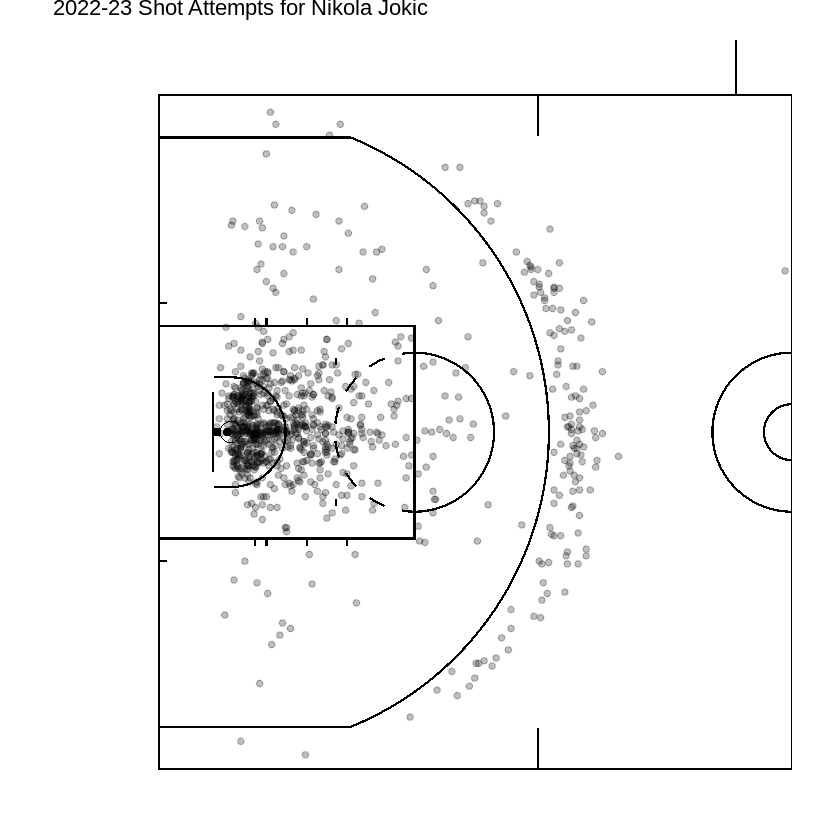

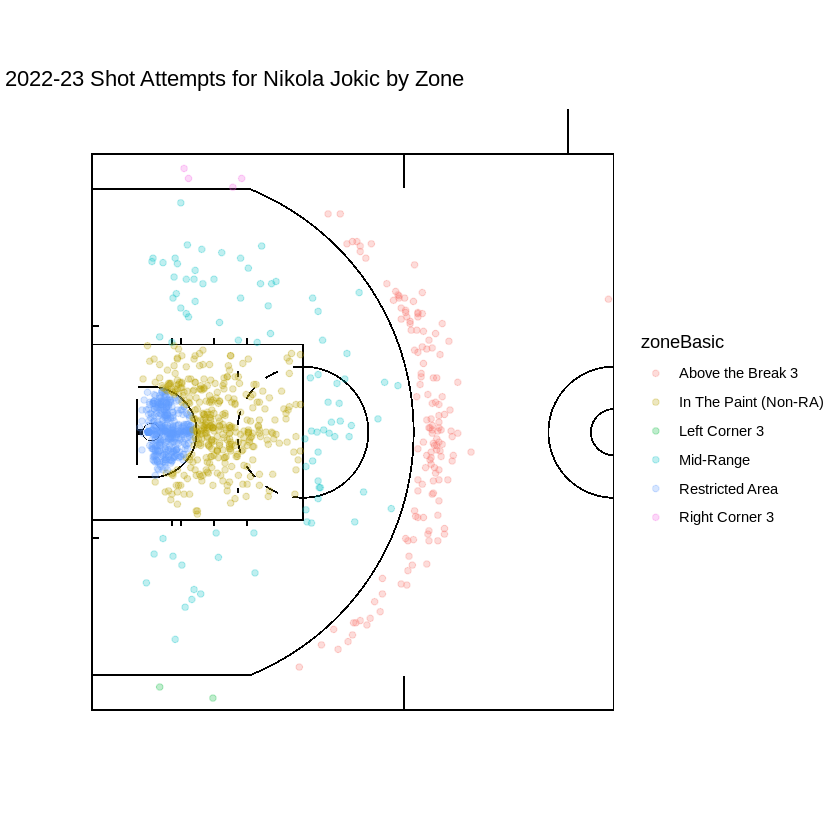

In [26]:
player_name <- "Nikola Jokic"
p <- geom_basketball(league = "NBA",
display_range = "defense",
color_updates = list(
defensive_half_court = "white",
offensive_half_court = "white",
court_apron = "white",
center_circle_fill = "white",
two_point_range = "white",
painted_area = "white",
free_throw_circle_fill = "white",
basket_ring = "black"))
p + geom_point(data = nba_nuggets_shots |>
filter(namePlayer == player_name,
yearSeason == 2023,
zoneBasic != "Backcourt"),
aes(y = locationX/10,
x = (locationY - 420)/10),
alpha = .25) +
labs(title = "2022-23 Shot Attempts for Nikola Jokic")
player_name <- "Nikola Jokic"
p <- geom_basketball(league = "NBA",
display_range = "defense",
color_updates = list(
defensive_half_court = "white",
offensive_half_court = "white",
court_apron = "white",
center_circle_fill = "white",
two_point_range = "white",
painted_area = "white",
free_throw_circle_fill = "white",
basket_ring = "black"))
p + geom_point(data = nba_nuggets_shots |>
filter(namePlayer == player_name,
yearSeason == 2023,
zoneBasic != "Backcourt"),
aes(y = locationX/10,
x = (locationY - 420)/10,
col = zoneBasic),
alpha = .25) +
labs(title = "2022-23 Shot Attempts for Nikola Jokic by Zone", shape = "")

While we have shown how to create shot charts for the NBA players, we can also do this for any league where we have data

The WNBA provides much
of this same data through an API, and we can access that API through the wehoop package

Two useful functions in the wehoop package are load_wnba_pbp
for play-by-play data and load_wnba_player_box for box score data. The first code block shows us downloading the Seattle Storm play-by-play data, and
we plot their two- and three-point shots in the subsequent code block

In this analysis, we also need to eliminate free throws, or else we will have those
clouding our shot chart

To do that, we use the `grepl()` function to identify shots of type “Free,” and we exclude them by using the exclamation point
before the function

Note that this time, when we display the court, we use the WNBA court, which has slightly different dimensions than an NBA court:

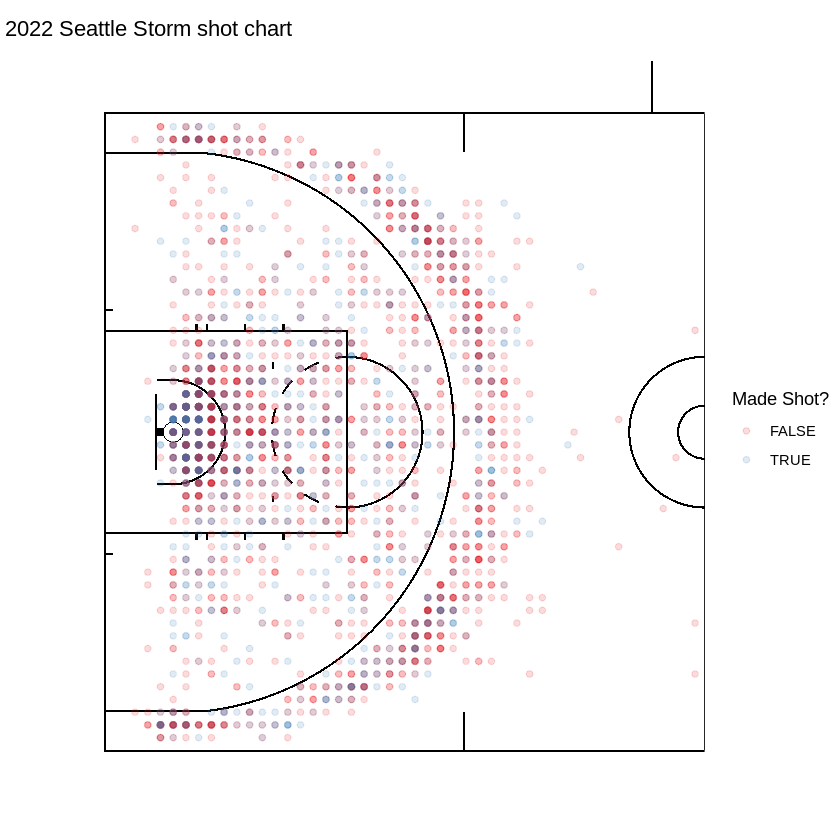

In [27]:
df <- load_wnba_pbp(2022) |>
filter((home_team_name == "Seattle" |
away_team_name == "Seattle"),
shooting_play == "TRUE",
!grepl("Free", type_text),
coordinate_y < 45)
p <- geom_basketball(league = "WNBA",
display_range = "defense",
color_updates = list(
defensive_half_court = "white",
offensive_half_court = "white",
court_apron = "white",
center_circle_fill = "white",
two_point_range = "white",
painted_area = "white",
free_throw_circle_fill = "white",
basket_ring = "black"))
p + geom_point(data = df,
aes(x = coordinate_x, y = coordinate_y,
col = as.factor(scoring_play)),
alpha = .15) +
labs(title = "2022 Seattle Storm shot chart",
color = "Made Shot?") +
scale_color_brewer(palette = "Set1")

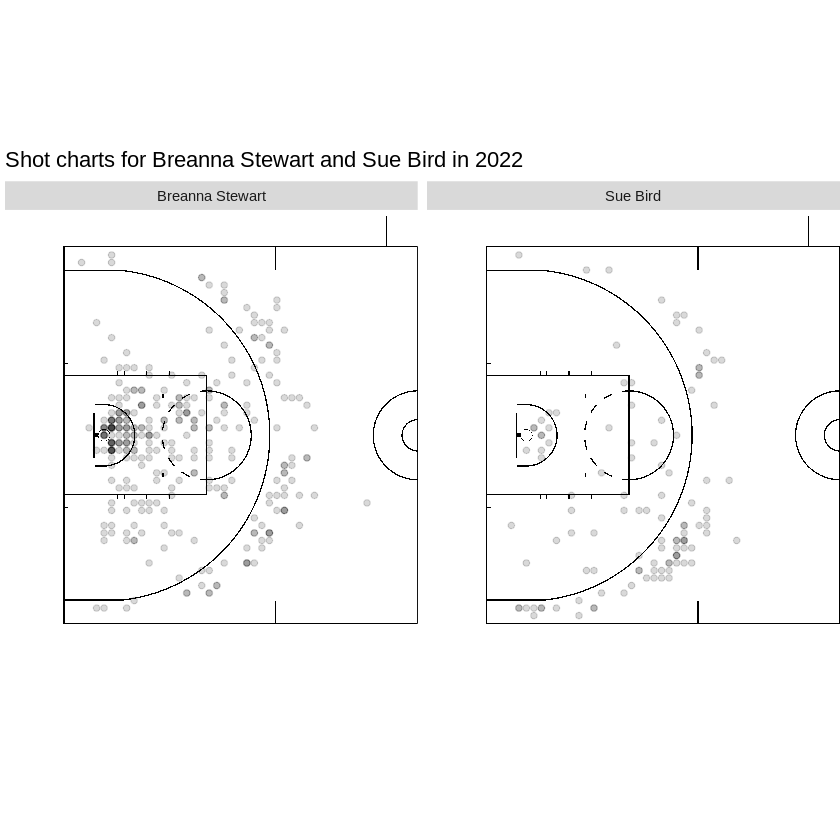

In [28]:
df_box <- load_wnba_player_box(2022)
df_player <- df_box |>
filter(team_short_display_name == "Storm") |>
select(athlete_display_name, athlete_id, team_short_display_name) |>
distinct()
df_storm <- left_join(df,
df_player,
by = c("athlete_id_1" = "athlete_id"))
p + geom_point(data = df_storm |>
filter(athlete_display_name %in%
c("Sue Bird", "Breanna Stewart")),
aes(x = coordinate_x, y = coordinate_y),
alpha = .15) +
facet_wrap(~ athlete_display_name, ncol = 2) +
labs(caption = "",
title = "Shot charts for Breanna Stewart and Sue Bird in 2022") +
theme(legend.position = "bottom")

We illustrate the use of load_wnba_player_box scores to display the average points scored per game for each team. In this case, we show the average
points per game for each player on the New York Liberty. Note the NaN associated with Kaila Charles, given that she only signed a two-day contract and
never actually played for the team in a game:

In [29]:
df_liberty <- df_box |>
group_by(team_name, athlete_display_name) |>
summarize(ppg = mean(points, na.rm = T)) |>
filter(team_name == "Liberty") |>
arrange(desc(ppg))
df_liberty

`summarise()` has grouped output by 'team_name'. You can override using the
`.groups` argument.


team_name,athlete_display_name,ppg
<chr>,<chr>,<dbl>
Liberty,Sabrina Ionescu,17.1538462
Liberty,Natasha Howard,15.1052632
Liberty,Betnijah Laney,11.2500000
Liberty,Marine Johannes,9.5555556
Liberty,Han Xu,8.2571429
Liberty,Stefanie Dolson,7.9230769
Liberty,Rebecca Allen,6.6785714
Liberty,Sami Whitcomb,6.2631579
Liberty,Crystal Dangerfield,5.1212121
